In [202]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
# pip install scikit-image

In [203]:
image_pixels = io.imread("images/jiraiya.jpg")
image_pixels.shape

(1949, 3464, 3)

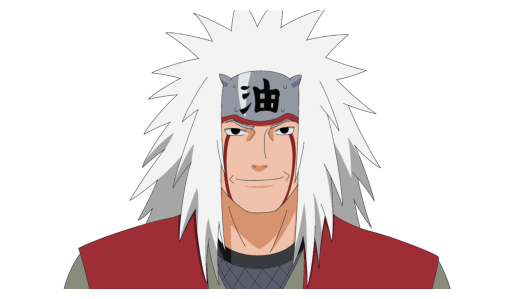

In [204]:
plt.imshow(image_pixels, cmap="gray")
plt.axis("off")
plt.show()

In [205]:
if image_pixels.shape[-1] == 4:
    image_pixels = image_pixels[..., :3]  # discard alpha

In [206]:
gray_img = color.rgb2gray(image_pixels)
gray_img[30:]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], shape=(1919, 3464))

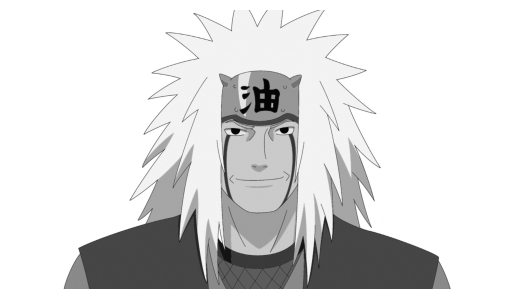

In [207]:
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

In [208]:
edge_sobel = filters.sobel(gray_img)
edge_sobel.shape

(1949, 3464)

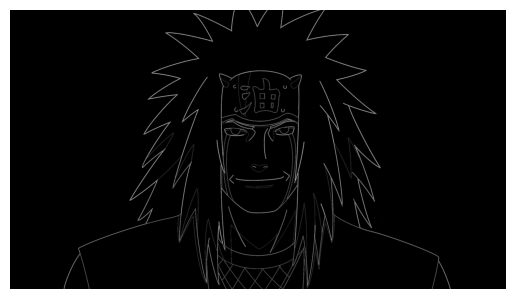

In [209]:
from skimage.util import img_as_ubyte

io.imsave("images/edge_sobel.png", img_as_ubyte(edge_sobel))

plt.imshow(edge_sobel, cmap="gray")
plt.axis("off")
plt.show()

In [210]:
threshold = 0.2
edges = edge_sobel > threshold
edges[100:110, 550:570]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [Fa

In [211]:
edge_pixel_indices = np.nonzero(edges)
edge_pixel_indices

(array([   0,    0,    0, ..., 1948, 1948, 1948], shape=(144221,)),
 array([1565, 1566, 1567, ..., 3075, 3076, 3077], shape=(144221,)))

In [212]:
edges[104, 572]

np.False_

In [213]:
edge_points = np.column_stack(np.nonzero(edges))
edge_points[:3]

array([[   0, 1565],
       [   0, 1566],
       [   0, 1567]])

In [214]:
contours = measure.find_contours(edges, level=0.5)
contours

[array([[1.9480e+03, 3.7450e+02],
        [1.9470e+03, 3.7450e+02],
        [1.9460e+03, 3.7450e+02],
        ...,
        [2.0000e+00, 1.5645e+03],
        [1.0000e+00, 1.5645e+03],
        [0.0000e+00, 1.5645e+03]], shape=(7123, 2)),
 array([[0.0000e+00, 1.5705e+03],
        [5.0000e-01, 1.5700e+03],
        [1.0000e+00, 1.5695e+03],
        ...,
        [1.5000e+00, 2.1960e+03],
        [1.0000e+00, 2.1965e+03],
        [0.0000e+00, 2.1965e+03]], shape=(34280, 2)),
 array([[0.0000e+00, 1.8045e+03],
        [5.0000e-01, 1.8040e+03],
        [1.0000e+00, 1.8035e+03],
        [2.0000e+00, 1.8035e+03],
        [2.5000e+00, 1.8030e+03],
        [3.0000e+00, 1.8025e+03],
        [3.5000e+00, 1.8020e+03],
        [4.0000e+00, 1.8015e+03],
        [4.5000e+00, 1.8010e+03],
        [5.0000e+00, 1.8005e+03],
        [5.5000e+00, 1.8000e+03],
        [6.0000e+00, 1.7995e+03],
        [6.5000e+00, 1.7990e+03],
        [7.0000e+00, 1.7985e+03],
        [8.0000e+00, 1.7985e+03],
        [8.5000e+

In [215]:
test_cont = contours[2]
test_cont.shape

(394, 2)

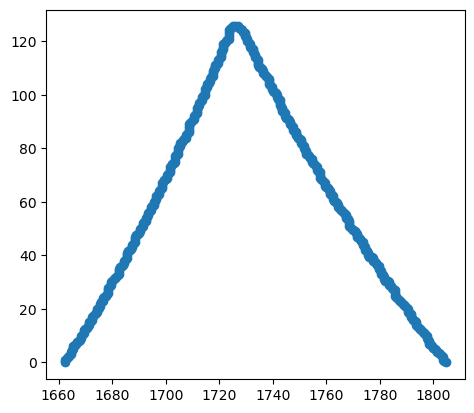

In [216]:
# plot the contour points
plt.plot(test_cont[:, 1], test_cont[:, 0], 'o')
plt.axis('image')
plt.show()

In [217]:
largest_countour_idx = 0
largest_countour_cnt = -1
for i, contour in enumerate(contours):
    n_points = contour.shape[0]
    if n_points < 20:
        continue

    if n_points > largest_countour_cnt:
        largest_countour_cnt = n_points
        largest_countour_idx = i
        print(f"New largest contour: {n_points}")

        y_vals = contour[:, 0]
        x_vals = contour[:, 1]

x_vals.shape, y_vals.shape

New largest contour: 7123
New largest contour: 34280


((34280,), (34280,))

In [218]:
t = np.arange(len(y_vals))
n = len(t)
n, t

(34280, array([    0,     1,     2, ..., 34277, 34278, 34279], shape=(34280,)))

In [219]:
max_n = 500

if n > max_n:
    y_vals = y_vals[::int(n/max_n)]
    x_vals = x_vals[::int(n/max_n)]
    n = len(x_vals)
    t = np.arange(n)
y_vals, y_vals, t

(array([   0. ,   56. ,  116. ,  146.5,  122.5,  100. ,   77.5,   57. ,
          38. ,   65.5,  105. ,  147. ,  190.5,  225. ,  210.5,  197.5,
         185.5,  175. ,  167.5,  183. ,  210.5,  239.5,  270. ,  301. ,
         333. ,  352.5,  365.5,  379.5,  395. ,  412.5,  431.5,  446.5,
         455. ,  466.5,  480.5,  506.5,  530.5,  556.5,  584. ,  613.5,
         614.5,  604.5,  596.5,  606. ,  639.5,  674. ,  709.5,  745.5,
         783. ,  822. ,  863. ,  844.5,  822.5,  802. ,  783.5,  822. ,
         861. ,  902. ,  942.5,  984.5, 1027. , 1062.5, 1090.5, 1058. ,
        1027. ,  997.5,  968.5, 1005.5, 1044. , 1084. , 1123.5, 1163.5,
        1204. , 1245.5, 1287. , 1323. , 1296. , 1267. , 1237.5, 1207. ,
        1197. , 1245. , 1291. , 1337. , 1382. , 1427. , 1465.5, 1437.5,
        1405. , 1404.5, 1452.5, 1490.5, 1475.5, 1462.5, 1450.5, 1434.5,
        1387. , 1327. , 1268.5, 1211. , 1155. , 1101. , 1106. , 1144.5,
        1184. , 1225.5, 1227. , 1172. , 1120. , 1068. , 1017.5, 

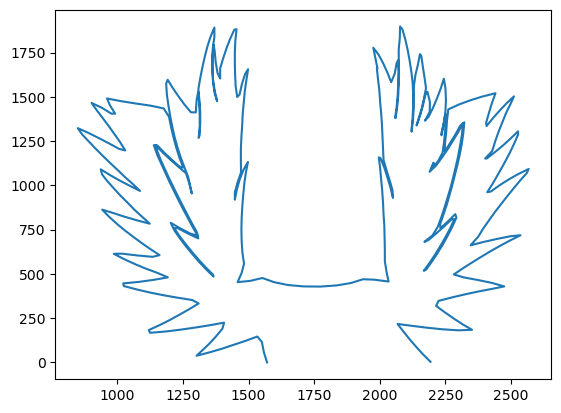

In [220]:
plt.plot(x_vals, y_vals)
plt.show()

In [221]:
# poly_n = n-1
# coeffs_x = np.polyfit(t, x_vals, deg=poly_n)
# coeffs_y = np.polyfit(t, y_vals, deg=poly_n)
# n, t

In [222]:
# t_for_plot = np.linspace(0, n-1, 300)
# x_poly = np.polyval(coeffs_x, t_for_plot)
# y_poly = np.polyval(coeffs_y, t_for_plot)
# t_for_plot, x_poly, y_poly

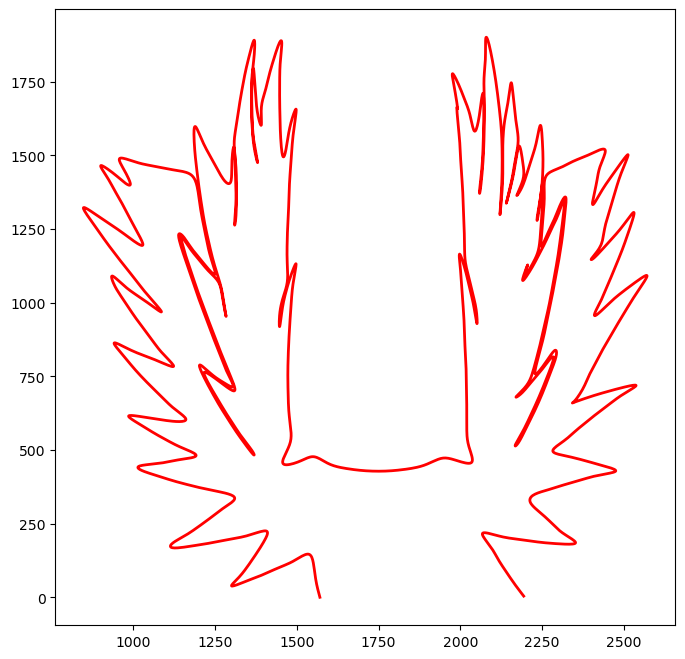

In [223]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_poly, y_poly, color="red", linewidth=2)

In [224]:
# pip install scipy
from scipy.interpolate import CubicSpline

In [225]:
sx = CubicSpline(t, x_vals, bc_type="natural")
sy = CubicSpline(t, y_vals, bc_type="natural")

In [226]:
t_for_plot = np.linspace(0, n-1, 5000)
x_poly = sx(t_for_plot)
y_poly = sy(t_for_plot)

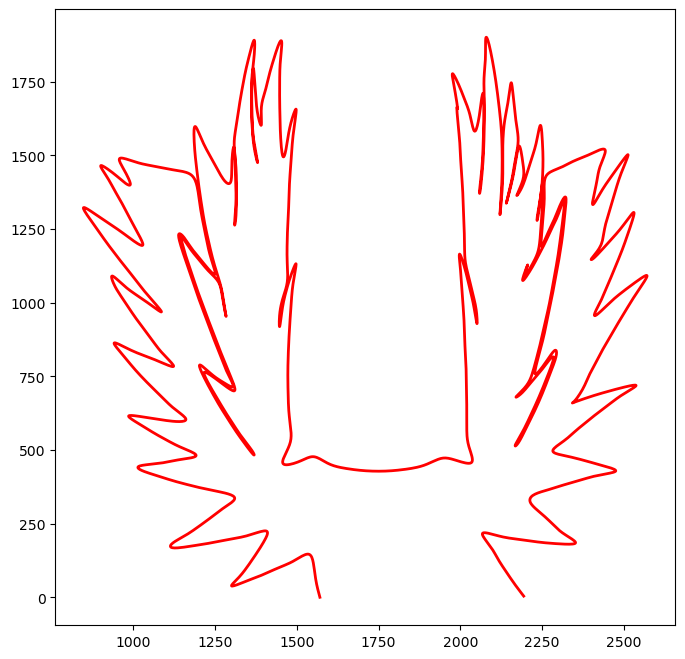

In [227]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x_poly, y_poly, color="red", linewidth=2)